Problem statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 


Task to be performed:
1.	Preliminary analysis:
a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 
c.	Study the occurrence of CVD across the Age category
d.	Study the composition of all patients with respect to the Sex category
e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
f.	Describe the relationship between cholesterol levels and a target variable 18008969999
g.	State what relationship exists between peak exercising and the occurrence of a heart attack
h.	Check if thalassemia is a major cause of CVD
i.	List how the other factors determine the occurrence of CVD
j.	Use a pair plot to understand the relationship between all the given variables
3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection


Import Libraries
There are a few libraries required to build a machine learning model:
pandas - It helps to retrieve datasets, handle missing data and do data wrangling.
Numpy - It helps to perform numerical operations in the dataset.
warnings - It helps to neglect the unwanted popups or exceptions.
matplotlib - It helps in data visualization.
seaborn - It also helps in data visualization and exploratory data analysis.
matplotlib inline - It is used to plot the charts or graphs in the notebook itself.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

CE Review
Note:

The data is a dataframe to store the data imported from the csv as rows and columns table format.
The head() function helps to view the first few data present in the data dataframe.

In [ ]:
data = pd.read_excel('1645792390_cep1_dataset.xlsx')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1) The shape of the dataset

In [ ]:
data.shape

(303, 14)

The information of the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The columns of the dataset

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

The Missing value un the datastet

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Their is no missing value in my dataset

1.	Preliminary analysis:
a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy


In [ ]:
data.duplicated().sum()

1

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [ ]:
data.cat = []
data.num = []
for column in data.columns:
  if len(data[column].unique())<=10:
    data.cat.append(column)
  else:
    data.num.append(column)  

<ipython-input-12-4f09e9bd9b1f>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.cat = []
<ipython-input-12-4f09e9bd9b1f>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.num = []


In [ ]:
data.cat

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
data.num

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
data.target.sum()

164

In [ ]:
data.cat

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
data.num

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

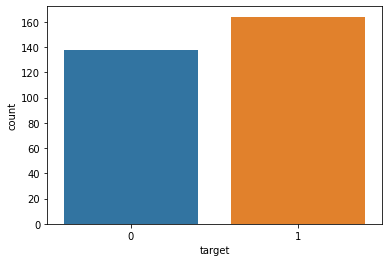

In [ ]:
sns.countplot(data=data, x='target')

* Insights from the graph
their is few female which is having the CVD
their are more male of CVD

In [ ]:
dsprct = data[data.target == 1].copy()
dsabst = data[data.target == 0].copy()

In [ ]:
dsabst.shape

(138, 14)

In [ ]:
dsprct.shape

(164, 14)

In [ ]:
dsprct.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


c.	Study the occurrence of CVD across the Age category

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


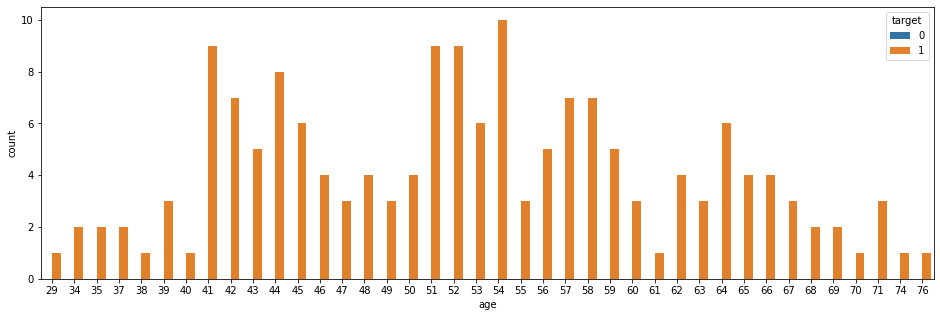

In [ ]:
plt.figure(figsize=(16,5))
sns.countplot(dsprct.age, hue=data.target)

distribution plot of CVD across the Age cateogory

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


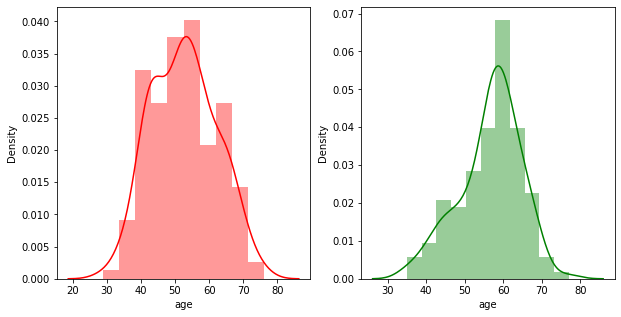

In [ ]:
figure, axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(dsprct.age,color='red',ax=axes[0])
sns.distplot(dsabst.age,color='green',ax=axes[1])

In [ ]:
vc = data.target.value_counts()

In [ ]:
vc

1    164
0    138
Name: target, dtype: int64

d.	Study the composition of all patients with respect to the Sex category

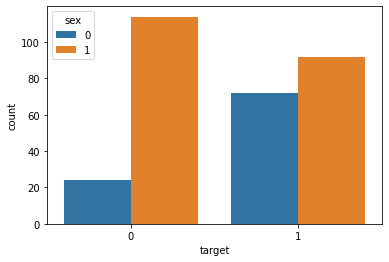

In [ ]:
sns.countplot(data=data,x=data.target, hue='sex')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarnin

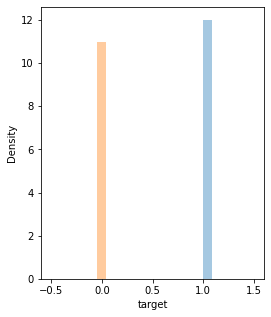

In [ ]:
plt.figure(figsize=(4,5))
sns.distplot(dsprct.target)
sns.distplot(dsabst.target)

e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

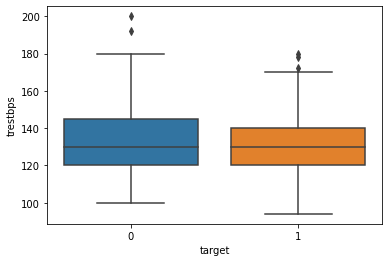

In [ ]:
sns.boxplot(data=data,x='target',y='trestbps')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


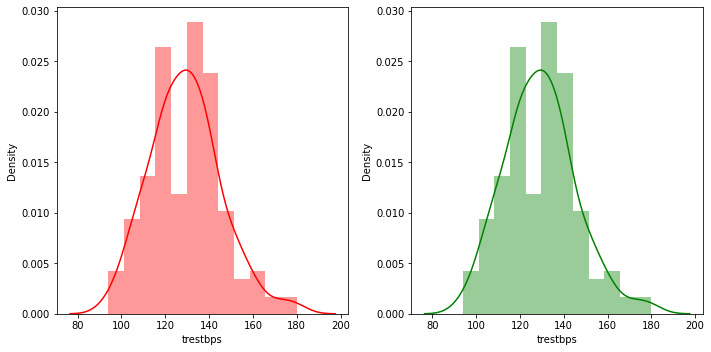

In [ ]:
figure, axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(dsprct.trestbps,color='red',ax=axes[0])
sns.distplot(dsprct.trestbps,color='green',ax=axes[1])
plt.tight_layout()

f.	Describe the relationship between cholesterol levels and a target variable 

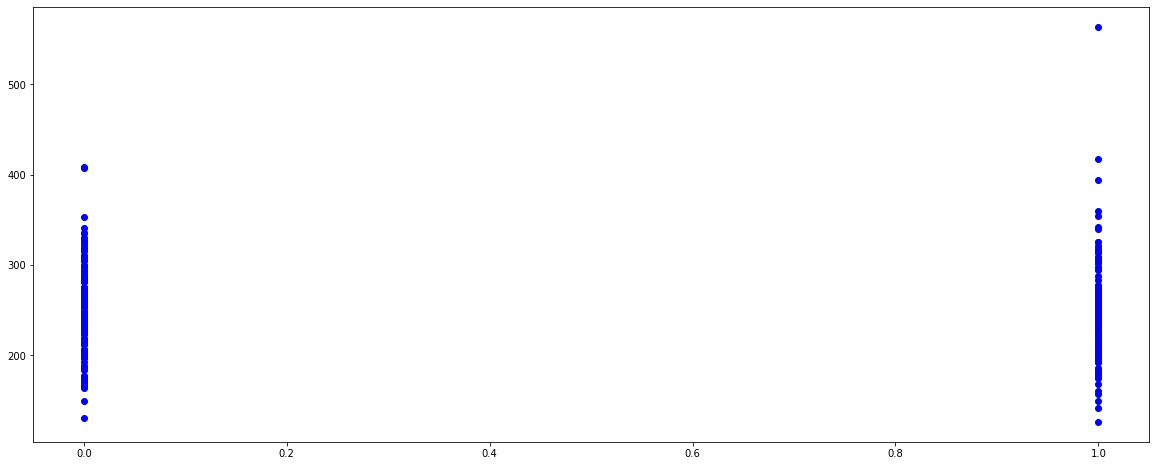

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter(x=data.target, y=data.chol, c='blue')

g.	State what relationship exists between peak exercising and the occurrence of a heart attack

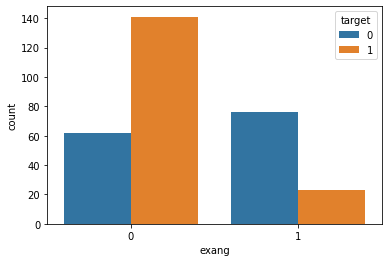

In [ ]:
sns.countplot(data=data, x=data.exang, hue='target')

h.	Check if thalassemia is a major cause of CVD

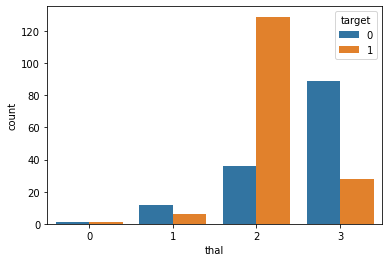

In [ ]:
sns.countplot(data=data, x=data.thal, hue='target')

i.	List how the other factors determine the occurrence of CVD

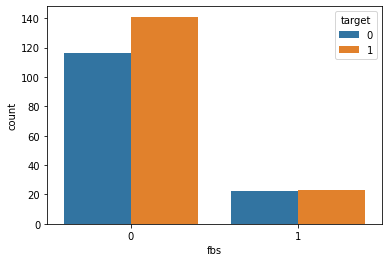

In [ ]:
sns.countplot(data=data, x=data.fbs, hue='target')

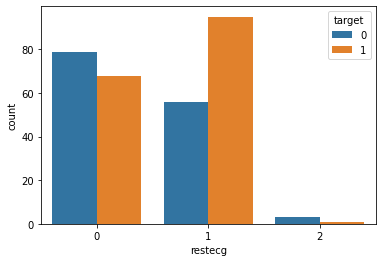

In [ ]:
sns.countplot(data=data, x=data.restecg, hue=data.target)

j.	Use a pair plot to understand the relationship between all the given variables

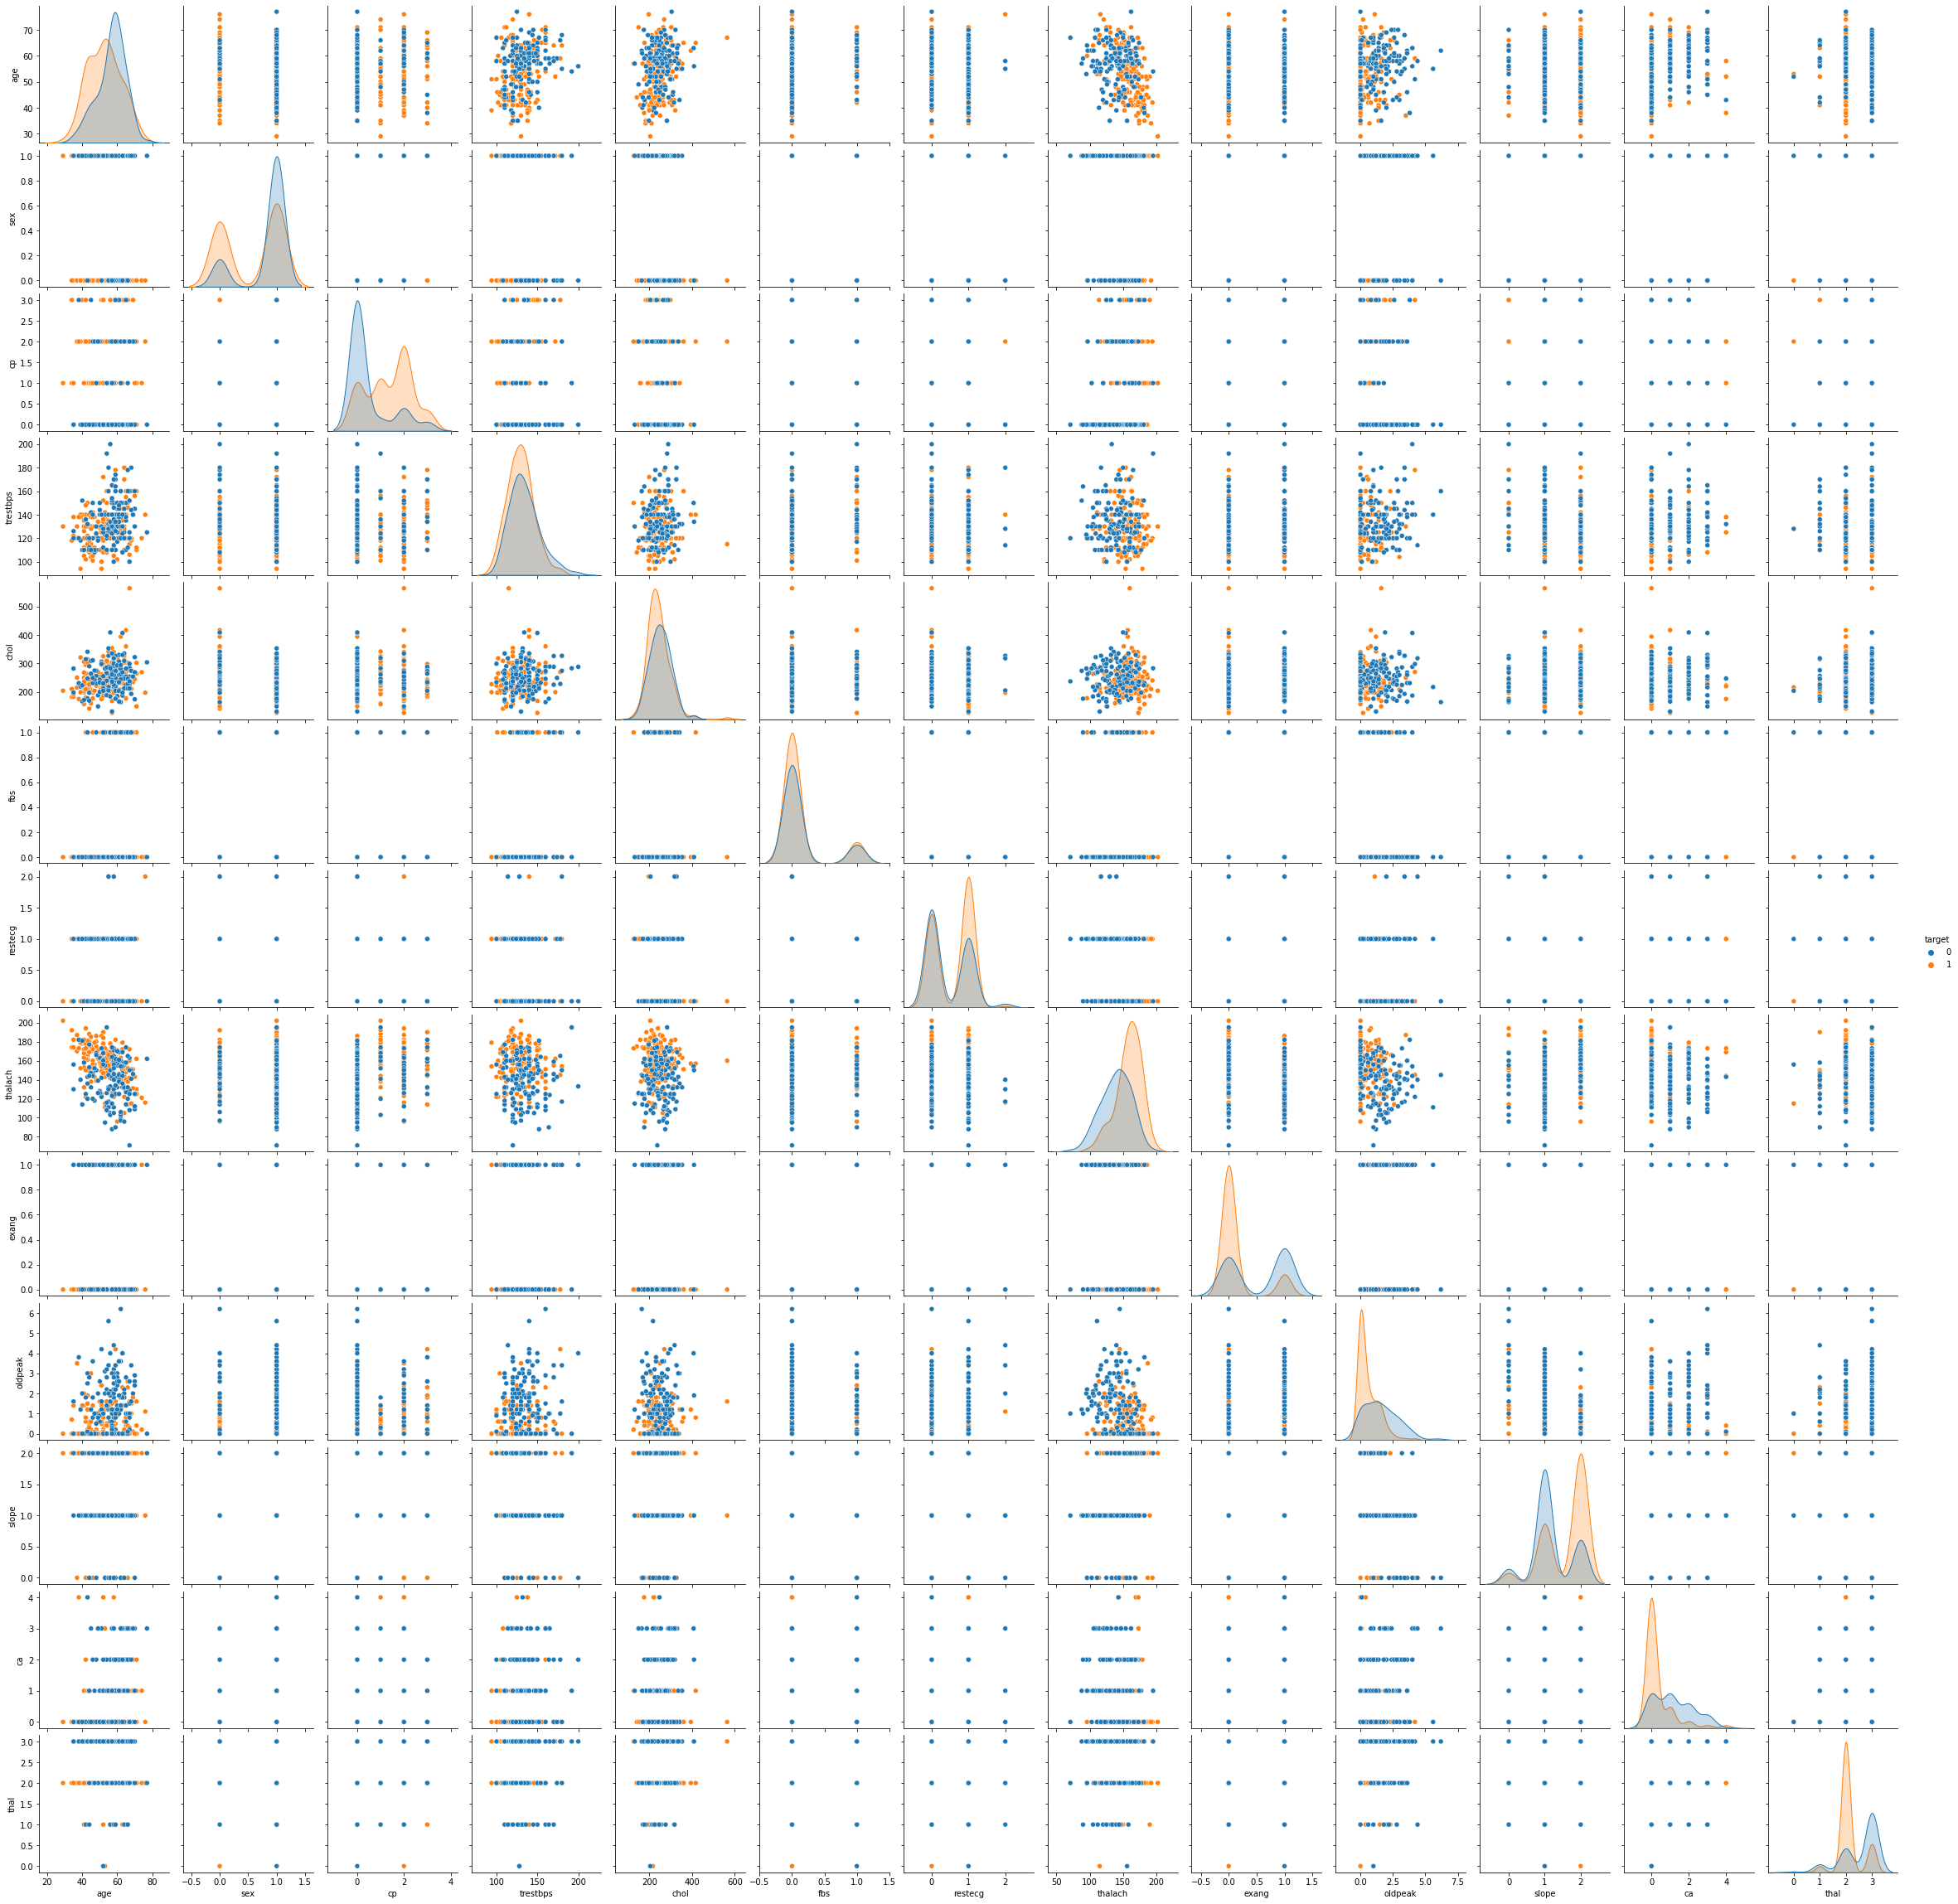

In [ ]:
sns.pairplot(data=data, hue='target')

3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
corr = data.corr()

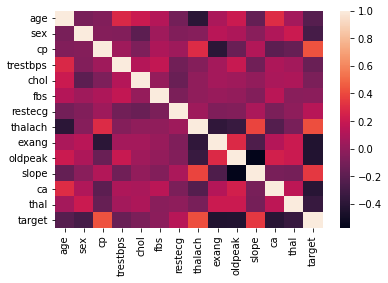

In [ ]:
sns.heatmap(corr)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X = data.drop(['target'],axis=1)
y = data['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict = lr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.83      0.90      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [ ]:
print(confusion_matrix(y_test, predict))

[[32  9]
 [ 5 45]]


In [ ]:
Acc0 = (27+49)/(27+12+3+49)
Acc0

0.8351648351648352

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
predictrfc = rfc.predict(x_test)
acc = rfc.score(x_train, y_train)*100

In [ ]:
acc

100.0

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, predictrfc))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [ ]:
print(confusion_matrix(y_test, predictrfc))

[[35  6]
 [ 6 44]]


In [ ]:
#Select the cell and click on run icon 
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,predictrfc))

Accuracy: 0.8681318681318682


In [ ]:
data_LR = data
data_LR.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
train_LR, test_LR = train_test_split(data_LR, test_size=0.30, random_state=101)
print(train_LR.shape)

(211, 14)


In [ ]:
train_LR.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1


In [ ]:
x_train_LR = train_LR.drop(['target'], axis = 1)
y_train_LR = train_LR.target
x_test_LR = test_LR.drop(['target'], axis=1)
y_test_LR = test_LR.target


In [ ]:
train_LR.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0


In [ ]:
train_LR.head(25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0


In [ ]:
import statsmodels.api as sm
model1 = sm.Logit(y_train_LR, x_train_LR)
model1 = model1.fit()

Optimization terminated successfully.
         Current function value: 0.364117
         Iterations 7


In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           12
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.4709
Time:                        16:23:14   Log-Likelihood:                -76.829
converged:                       True   LL-Null:                       -145.21
Covariance Type:            nonrobust   LLR p-value:                 2.700e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0035      0.023      0.157      0.875      -0.041       0.048
sex           -1.3074      0.509     -2.568      0.010      -2.305      -0.310
cp             0.9841      0.225      4.370      0.000       0.543       1.426
trestbps      -0.0040      0.012     -0.334      0.738      -0.027       0.019
chol           0.0015      0.005      0.304      0.761      -0.008       0.011
fbs            0.4763      0.630      0.756      0.450      -0.759       1.711
restecg        0.5569      0.396      1.408      0.159      -0.218       1.332
thalach        0.0151      0.010      1.576      0.115      -0.004       0.034
exang         -0.8825      0.476     -1.856      0.063      -1.815       0.049
oldpeak       -0.6470      0.259     -2.494      0.013      -1.155      -0.139
slope          0.5162      0.450      1.147      0.252      -0.366       1.399
ca            -0.6283      0.222     -2.825      0.005      -1.064      -0.192
thal          -0.7859      0.350     -2.246      0.025      -1.472      -0.100
==============================================================================
"""

i got the accuracy of 79% by logistic regression

i got the accuracy of 80% by random forest